<a href="https://colab.research.google.com/github/kkamal11/Machine-Learning__MLP/blob/main/Regression__Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To enable the inline backend for usage with the IPython Notebook
%matplotlib inline 
# plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.titlesize'] = 16

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [113]:
df = pd.read_csv('/content/V1.csv')

In [114]:
df.shape

(1000, 13)

In [115]:
df.head()

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/23/2015,finishing,12,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,0.902500
1,3/7/2015,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,0.800579
2,2/16/2015,sweing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965
3,1/11/2015,finishing,6,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,0.597348
4,2/17/2015,finishing,3,0.5,5.13,NaN,1800,0,0.0,0,0,15.0,0.786600


In [116]:
df.columns.values

array(['date', 'department', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype=object)

In [117]:
features = ['date', 'department', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']
target = ['actual_productivity']

#### How many total number of features (Excluding target variable) are there in the dataset?

In [118]:
print('Total number of features is', len(features))

Total number of features is 12


#### Which of the following column have missing values ?

In [119]:
df.isna().sum()

date                       0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      414
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [120]:
df.isnull().sum()

date                       0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      414
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

#### What are the unique department mentioned in the dataset?

In [121]:
df['department'].unique()

array(['finishing', 'sweing', 'finishing '], dtype=object)

#### Which of the following columns have categorical data?

In [122]:
categorical_feat = ['department']

In [123]:
print(f"The feature '{categorical_feat[0]}' has categorical data.")

The feature 'department' has categorical data.


#### Replace all NaN value in "wip" column by 0 and Check how many outliers are there in "incentive" column (Consider any incentive value >1000 as outlier) ?

In [124]:
df['wip']

0         NaN
1       983.0
2      2103.0
3         NaN
4         NaN
        ...  
995       NaN
996       NaN
997    1271.0
998       NaN
999       NaN
Name: wip, Length: 1000, dtype: float64

In [125]:
df['wip'] = df['wip'].replace({np.nan:0})

In [126]:
df.isna().sum()

date                     0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [127]:
df.head()

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/23/2015,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0,0.902500
1,3/7/2015,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,0.800579
2,2/16/2015,sweing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965
3,1/11/2015,finishing,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0,0.597348
4,2/17/2015,finishing,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0,0.786600


In [128]:
num_of_outlier = df[df['incentive'] > 1000].shape[0]
print(num_of_outlier)

5


#### Break the dataset into X and y, where the column "actual_productivity" goes to y and rest of the columns go to X. Enter the avg value of "actual_productivity" column?

In [154]:
X = df[features]
y = df[target]

In [130]:
print(round(np.mean(y.to_numpy()),3))

0.732


#### Plot the heatmap and mark the pair which has highest correlation value.

In [131]:
features_ = ['targeted_productivity', 'smv', 'wip', 'over_time', 'no_of_workers', 'actual_productivity']

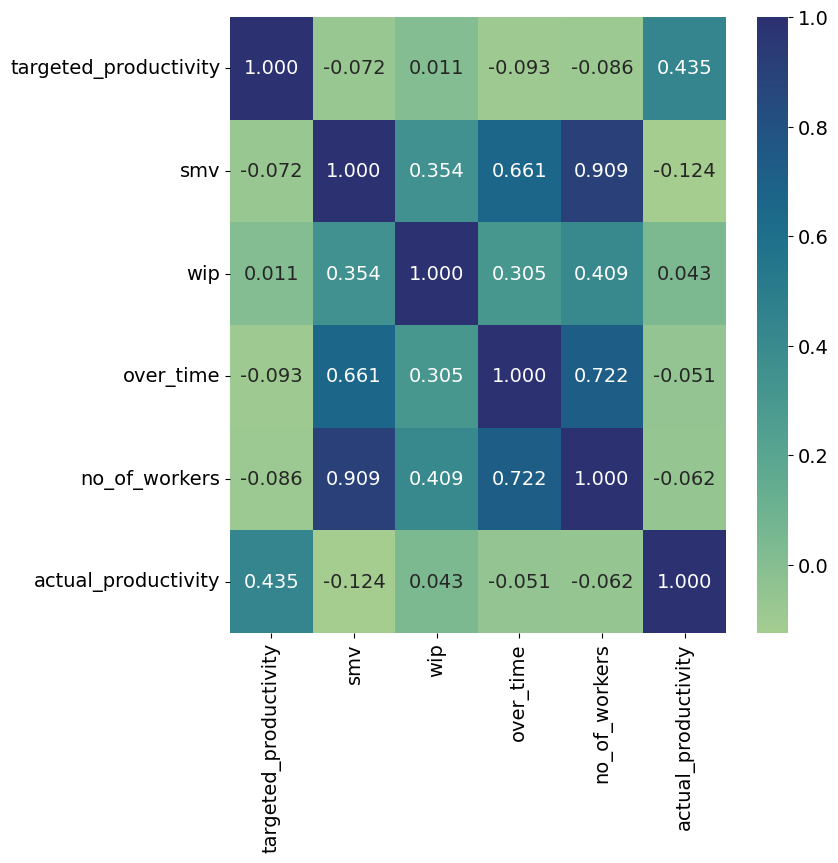

In [132]:
sns.heatmap(df[features_].corr(), annot=True, fmt=".3f",cmap="crest")
plt.show()

Step 1: Drop the date column from X data.

Step 2: We can see in "department" column  wrong spelling of "Sewing" is given. Update it to "Sewing" in X dataset.

Step 3: At some places in "department" column "finishing" variable is written with an extra space So, replace "finishing " with "finishing" in X dataset.


Step 4 Use pd.getdummies to encode all  categorical features of X dataset. 

#### What is the total number of  "finishing" label in department column of X dataset?

In [155]:
X = X.drop(columns=['date'])

In [156]:
X.head()

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0
1,sweing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0
2,sweing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0
3,finishing,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0
4,finishing,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0


In [160]:
# X[X['department'] == 'sweing'] = "Sewing"
X['department'] = X['department'].replace({'sweing':"Sewing"})

In [161]:
# X[X['department'] == 'finishing '] = "finishing"
X['department'] = X['department'].replace({'finishing ':"finishing"})

In [162]:
X[X['department'] == 'finishing'].shape

(414, 11)

In [163]:
X.head()

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,finishing,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0
1,Sewing,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0
2,Sewing,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0
3,finishing,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0
4,finishing,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0


In [164]:
X = pd.get_dummies(data=X,columns=['department'])

In [165]:
X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_Sewing,department_finishing
0,12,0.8,5.13,0.0,1080,0,0.0,0,0,9.0,0,1
1,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,1,0
2,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,1,0
3,6,0.8,2.90,0.0,1440,0,0.0,0,0,8.0,0,1
4,3,0.5,5.13,0.0,1800,0,0.0,0,0,15.0,0,1


#### What is the total number of columns in X dataset now?

In [166]:
len(X.columns.values)

12

#### Split the dataset into training and test dataset using train test split into `70:30` ratio while keeping `random_state =32`. what is the shape of the `X_train` dataset?

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [168]:
X_train.shape

(700, 12)

#### Apply LinearRegression on the 'x_train' and 'y_train' data. Calculate the score on the 'x_test' and 'y_test'. Which of the following options represent the calculated $R^2$?

In [169]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [170]:
lin_reg.score(X_test, y_test)

0.2743596171803069

#### Using the Linear regression model, compute the cross-validation scores for 9 splits on training data (x_train and y_train) using cross_val_score.Enter the maximum value of $R^2$?

In [174]:
scores = cross_val_score(lin_reg, X, y, cv=9)
scores

array([0.17367568, 0.10262541, 0.21349482, 0.25631685, 0.42789596,
       0.37254341, 0.20139021, 0.31054274, 0.42043449])

In [177]:
np.max(scores).round(4)

0.4279

#### Apply `SequentialFeatureSelector` with `LinearRegression()` estimator and select 5 features by fitting to the `x_train` and `y_train`. Which of the following option represents the correct integer index, of the selected features list?

In [180]:
sfs = SequentialFeatureSelector(lin_reg, n_features_to_select=5)

In [181]:
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [182]:
sfs.n_features_in_ #Number of features seen during fitting

12

In [184]:
sfs.feature_names_in_ #Names of features seen during fitting

array(['team', 'targeted_productivity', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'department_Sewing', 'department_finishing'],
      dtype=object)

In [185]:
sfs.n_features_to_select_

5

In [190]:
selected_features_true_false = sfs.support_

In [191]:
selected_features = X.columns.values[selected_features_true_false]

In [192]:
selected_features

array(['team', 'targeted_productivity', 'smv', 'idle_men',
       'no_of_workers'], dtype=object)

In [194]:
np.where(selected_features_true_false)[0]

array([0, 1, 2, 7, 9])

#### Take SelectKBest feature selector with k=5 and mutual_info_regression as scoring function and fit it to training data(x_train and y_train), then transform it.Which of the following options represent the 5 selected features using above instructions?

In [199]:
skb = SelectKBest(mutual_info_regression, k=5)
X_new = skb.fit_transform(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
X_new.shape

(1000, 5)

#### Apply Ridge regression `Ridge()` with default penalty value on `x_train` and `y_train` and calculate the $R^2$ score on `x_train` and `y_train`. Which of the following options represents the correct score (Upto 4 digits after decimal points)?

In [207]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [210]:
X_train.shape, y_train.shape

((700, 12), (700, 1))

In [211]:
ridge_reg.score(X_train, y_train)

0.29389210400668586

In [214]:
y_pred = ridge_reg.predict(X_train)
r2_score(y_train, y_pred)

0.29389210400668586

#### Apply Lasso regression with alpha=0.1 on the training data. Enter the value of the intercept you got correctly upto 4 digits after decimal points.

In [217]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [218]:
lasso_reg.coef_

array([-1.05719575e-03,  0.00000000e+00, -8.82853988e-04,  9.55743139e-06,
       -5.94181360e-07,  6.80211027e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [219]:
lasso_reg.intercept_

array([0.74483655])

#### Fit SGDRegressor() estimator with random_state=32 on the training data and predict actual_productivity (y_test) for test data. The parameters are initialized with default values. Calculate and mark the correct mean_squared_error value between y_test and predicted y_test from the given options.

In [221]:
sgd_reg = SGDRegressor(random_state=32)
sgd_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=32)

In [222]:
y_pred = sgd_reg.predict(X_test)

In [226]:
mean_squared_error(y_test,y_pred)

1.4773095857140542e+31

Apply cross validation strategy on training data using SGDRegressor(random_state=32) as an estimator and cv= ShuffleSplit. Set paramters for ShuffleSplit as following.

- n_split to be taken as 8.
- test_size to be taken as 40%.
- random_state value to be taken as 32

#### Mark the correct mean value of cross_val_score obtained upto four decimal places from the given options.

In [230]:
cv = ShuffleSplit(n_splits=8, test_size=0.4, random_state=32)
print(cv)

ShuffleSplit(n_splits=8, random_state=32, test_size=0.4, train_size=None)


In [231]:
sgd_reg = SGDRegressor(random_state=32)

In [233]:
scores = cross_val_score(sgd_reg, X_train, y_train, cv=cv)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [238]:
np.mean(scores)

-5.159534287786373e+34


Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use GridSearchCV with this created pipeline and following hyperparameter values on training data(x_train, y_train) to fit the model.

i) Keep polynomial degree as : [1, 2, 3]

ii) alpha value to be taken as : np.logspace(-3, 0, num=8)

iii) scoring : neg_mean_absolute_error .

(Note: Kindly ignore the warning.)

Enter the best alpha value you got using above instructions.(Upto 4 decimal places)

In [249]:
degree = np.array([1, 2, 3])
alpha = np.logspace(-3, 0, num=8)

In [250]:
print(alpha)

[0.001      0.0026827  0.00719686 0.01930698 0.05179475 0.13894955
 0.37275937 1.        ]


In [274]:
lasso_grid_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lasso", Lasso())
    ])
param_grid = {
    'poly__degree': (1, 2, 3),
    'lasso__alpha': alpha
    }

lasso_grid_search = GridSearchCV(lasso_grid_pipeline, param_grid=param_grid, scoring="neg_mean_absolute_error", return_train_score=True)

In [272]:
lasso_grid_search

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([0.001     , 0.0026827 , 0.00719686, 0.01930698, 0.05179475,
       0.13894955, 0.37275937, 1.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [275]:
lasso_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.580e+00, tolerance: 1.789e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.550e+00, tolerance: 1.732e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.943e+00, tolerance: 1.835e-03

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.001     , 0.0026827 , 0.00719686, 0.01930698, 0.05179475,
       0.13894955, 0.37275937, 1.        ]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [277]:
lasso_grid_search.best_params_

{'lasso__alpha': 1.0, 'poly__degree': 2}

Fit the PCA model using following parameter values on training data and apply the dimensionality reduction on it(training data).

n_components=5

svd_solver='full'

whiten=True

random_state=32

#### What is the sum of explained variance ratio corresponding to each of the selected components.

In [280]:
pca = PCA(
    n_components=5,
    svd_solver='full',
    whiten=True,
    random_state=32
)

In [281]:
pca.fit_transform(X_train)

array([[-1.31501363, -0.05425505, -0.24409114,  0.69965683,  0.03213908],
       [ 0.55102839,  0.31234185, -0.22195913, -0.64561285, -0.11074198],
       [-1.11034521, -0.12540097, -0.23763872,  0.54635395,  0.01177669],
       ...,
       [ 1.52367269, -0.31436568,  0.01795088,  0.50437636, -0.10693525],
       [ 1.65905887, -0.08189585,  0.12759841,  0.43038652, -0.02179163],
       [-1.1103458 , -0.12540204, -0.23764452,  0.57587893,  0.02495992]])

In [284]:
X_tr_pca = pca.explained_variance_ratio_

In [285]:
np.sum(pca.explained_variance_ratio_)

0.9999977408577673

#### Use this transformed training data and y_train to fit the RidgeCV estimator model having alpha value as [0.1,0.01,1,0.005] .Enter the best_score_ value you got for this model.

In [286]:
alpha = [0.1,0.01,1,0.005]

In [295]:
ridge_pca_pipe = Pipeline([
    ('pca', pca),
    ('reg', RidgeCV(alphas=alpha))
])


In [296]:
ridge_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca',
                 PCA(n_components=5, random_state=32, svd_solver='full',
                     whiten=True)),
                ('reg', RidgeCV(alphas=[0.1, 0.01, 1, 0.005]))])

In [298]:
ridge_pca_pipe[-1].best_score_

-0.05199837263469401

---